## Battery_Health_Prediction
Over time, batteries lose their ability to hold a charge and perform efficiently.
This affects the performance of devices like laptops, phones, and other electronics.
The goal of this project is to use machine learning to predict the health of a battery
based on data such as voltage, current, temperature, and usage patterns. By analyzing this data,
we want to estimate how healthy a battery is and how much life it has left. 
This can help users take better care of their batteries and avoid unexpected failures.

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
# Step 2: Load the Dataset
df = pd.read_csv("battery_health_prediction_20000.csv")

In [3]:
# Step 3: Check Data
df.head()

,Device_Type,Battery_Capacity_mAh,Charge_Cycles,Avg_Temp_Celsius,Avg_Charge_Time_Hrs,Fast_Charging,Screen_On_Time_Hrs,Age_Months,Battery_Health_Percent
0,Mobile,4556,1256,45.1,1.25,No,3.11,21,40.0
1,Laptop,6437,913,49.0,2.53,No,8.02,58,40.0
2,Mobile,4396,597,48.9,2.31,No,3.24,59,40.0
3,Mobile,3116,1110,40.5,2.38,No,6.13,26,40.0
4,Mobile,4436,1057,43.2,3.40,Yes,7.82,16,40.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Device_Type             20000 non-null  object 
 1   Battery_Capacity_mAh    20000 non-null  int64  
 2   Charge_Cycles           20000 non-null  int64  
 3   Avg_Temp_Celsius        20000 non-null  float64
 4   Avg_Charge_Time_Hrs     20000 non-null  float64
 5   Fast_Charging           20000 non-null  object 
 6   Screen_On_Time_Hrs      20000 non-null  float64
 7   Age_Months              20000 non-null  int64  
 8   Battery_Health_Percent  20000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Battery_Capacity_mAh,Charge_Cycles,Avg_Temp_Celsius,Avg_Charge_Time_Hrs,Screen_On_Time_Hrs,Age_Months,Battery_Health_Percent
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4998.459400,778.000750,37.542040,3.014111,5.994655,29.893150,49.628795
std,1158.125745,417.507655,7.223048,1.153375,2.301438,17.028465,13.101431
min,3000.000000,50.000000,25.000000,1.000000,2.000000,1.000000,40.000000
25%,3990.000000,417.000000,31.400000,2.020000,4.000000,15.000000,40.000000
50%,4996.000000,781.000000,37.600000,3.010000,5.980000,30.000000,40.000000
75%,6004.000000,1137.000000,43.800000,4.020000,7.960000,45.000000,57.925000
max,7000.000000,1499.000000,50.000000,5.000000,10.000000,59.000000,96.900000


In [6]:
df

,Device_Type,Battery_Capacity_mAh,Charge_Cycles,Avg_Temp_Celsius,Avg_Charge_Time_Hrs,Fast_Charging,Screen_On_Time_Hrs,Age_Months,Battery_Health_Percent
0,Mobile,4556,1256,45.1,1.25,No,3.11,21,40.0
1,Laptop,6437,913,49.0,2.53,No,8.02,58,40.0
2,Mobile,4396,597,48.9,2.31,No,3.24,59,40.0
3,Mobile,3116,1110,40.5,2.38,No,6.13,26,40.0
4,Mobile,4436,1057,43.2,3.40,Yes,7.82,16,40.0
...,...,...,...,...,...,...,...,...,...
19995,Mobile,3163,100,26.7,3.39,No,4.06,7,92.0
19996,Mobile,3961,198,47.1,3.88,No,8.49,35,60.1
19997,Mobile,3726,1165,27.1,4.16,No,3.16,42,40.0
19998,Laptop,5027,417,39.9,1.47,No,9.78,12,64.5


In [7]:
df.describe()

,Battery_Capacity_mAh,Charge_Cycles,Avg_Temp_Celsius,Avg_Charge_Time_Hrs,Screen_On_Time_Hrs,Age_Months,Battery_Health_Percent
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4998.459400,778.000750,37.542040,3.014111,5.994655,29.893150,49.628795
std,1158.125745,417.507655,7.223048,1.153375,2.301438,17.028465,13.101431
min,3000.000000,50.000000,25.000000,1.000000,2.000000,1.000000,40.000000
25%,3990.000000,417.000000,31.400000,2.020000,4.000000,15.000000,40.000000
50%,4996.000000,781.000000,37.600000,3.010000,5.980000,30.000000,40.000000
75%,6004.000000,1137.000000,43.800000,4.020000,7.960000,45.000000,57.925000
max,7000.000000,1499.000000,50.000000,5.000000,10.000000,59.000000,96.900000


In [8]:
df.isnull().sum()

Device_Type               0
Battery_Capacity_mAh      0
Charge_Cycles             0
Avg_Temp_Celsius          0
Avg_Charge_Time_Hrs       0
Fast_Charging             0
Screen_On_Time_Hrs        0
Age_Months                0
Battery_Health_Percent    0
dtype: int64

In [9]:
features=[features for features in df.columns]
print(features)

['Device_Type', 'Battery_Capacity_mAh', 'Charge_Cycles', 'Avg_Temp_Celsius', 'Avg_Charge_Time_Hrs', 'Fast_Charging', 'Screen_On_Time_Hrs', 'Age_Months', 'Battery_Health_Percent']


In [10]:
df[features].columns

Index(['Device_Type', 'Battery_Capacity_mAh', 'Charge_Cycles',
       'Avg_Temp_Celsius', 'Avg_Charge_Time_Hrs', 'Fast_Charging',
       'Screen_On_Time_Hrs', 'Age_Months', 'Battery_Health_Percent'],
      dtype='object')

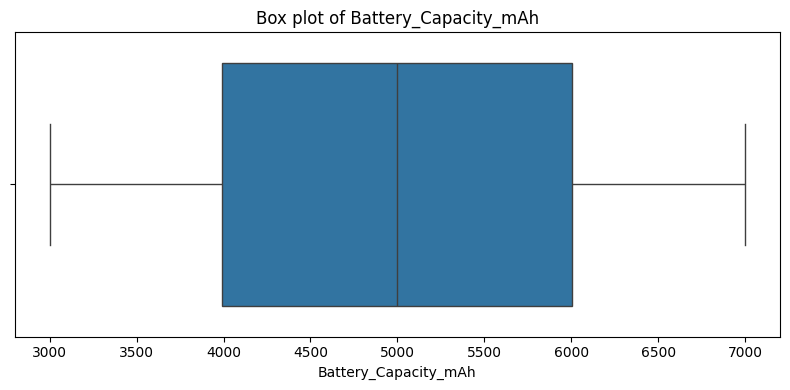

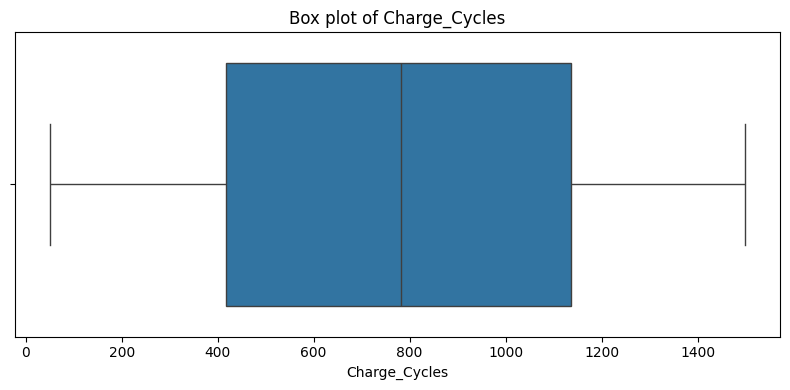

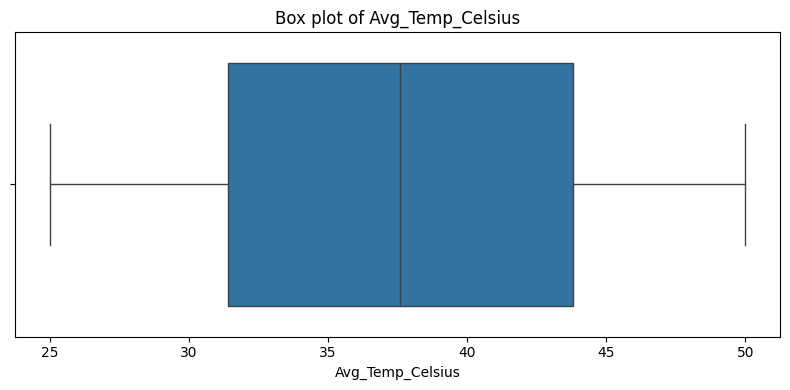

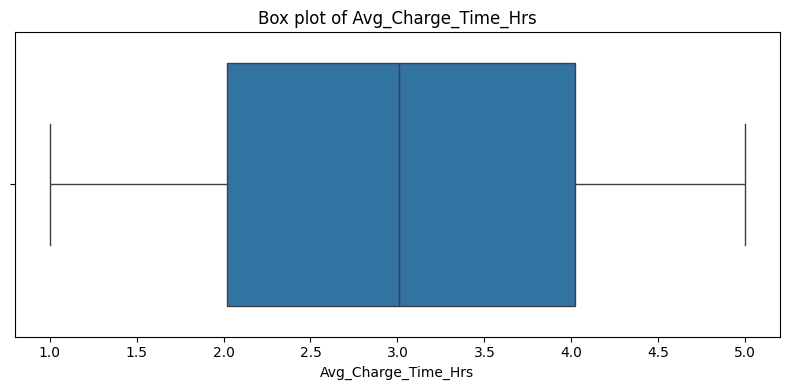

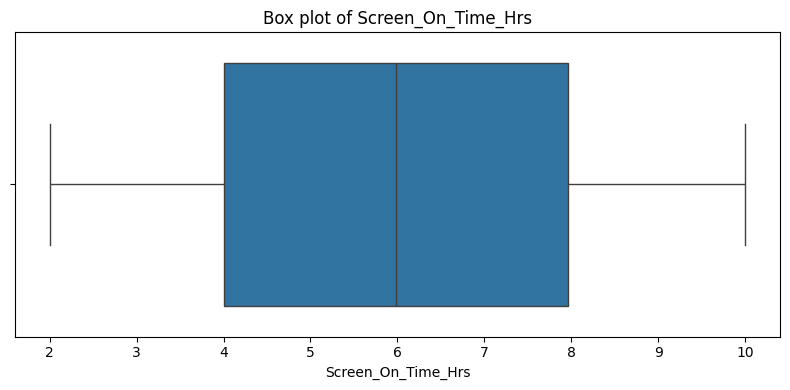

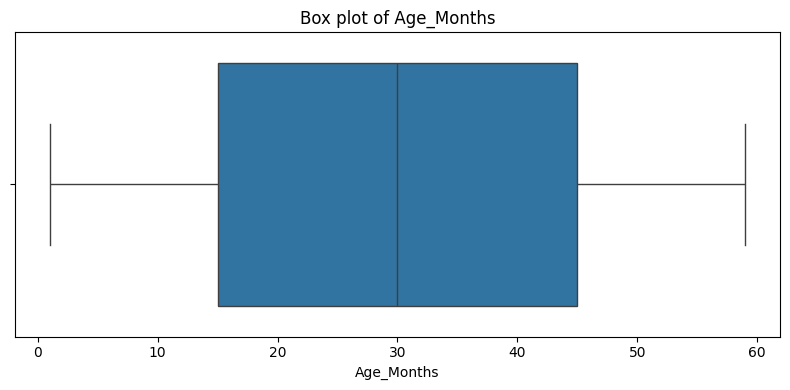

In [11]:
columns= ['Device_Type', 'Battery_Capacity_mAh', 'Charge_Cycles',
       'Avg_Temp_Celsius', 'Avg_Charge_Time_Hrs', 'Fast_Charging',
       'Screen_On_Time_Hrs', 'Age_Months']

df_features=df[features][columns].select_dtypes(include=["int64","float64"])
for column in df_features.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_features[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

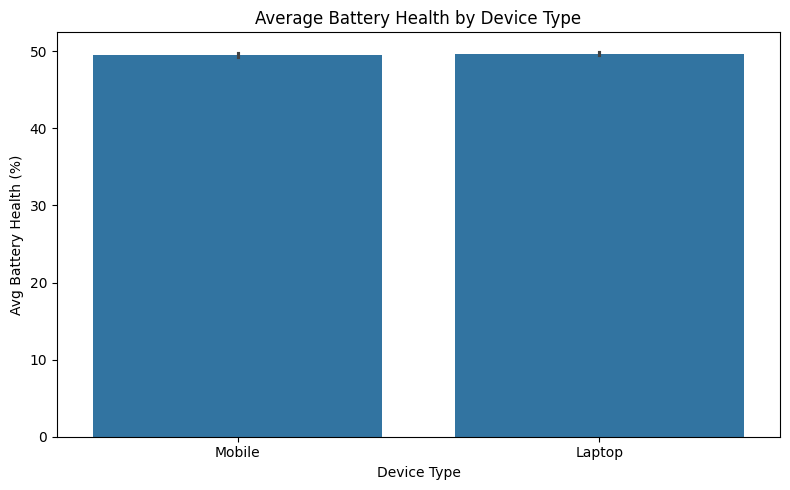

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x='Device_Type', y='Battery_Health_Percent', data=df, estimator=np.mean)
plt.title('Average Battery Health by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Avg Battery Health (%)')
plt.tight_layout()
plt.show()

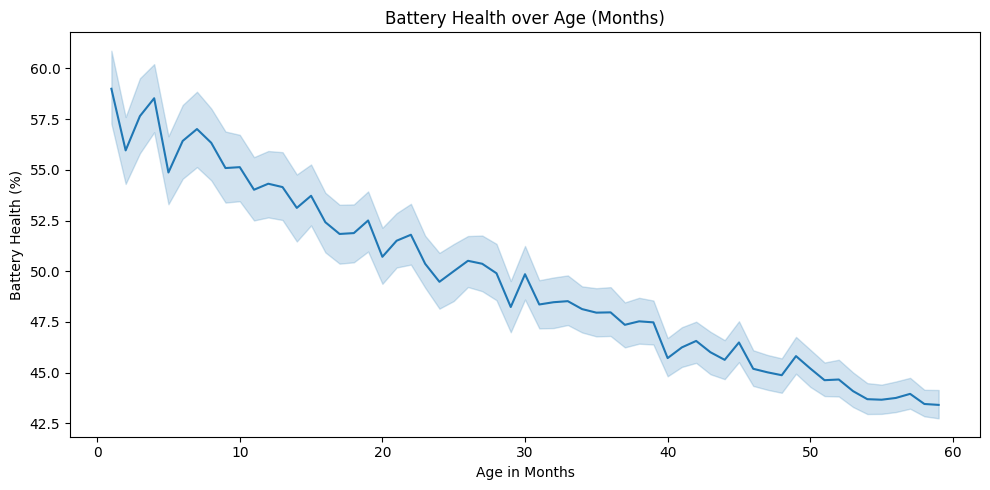

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Age_Months', y='Battery_Health_Percent', data=df)
plt.title('Battery Health over Age (Months)')
plt.xlabel('Age in Months')
plt.ylabel('Battery Health (%)')
plt.tight_layout()
plt.show()


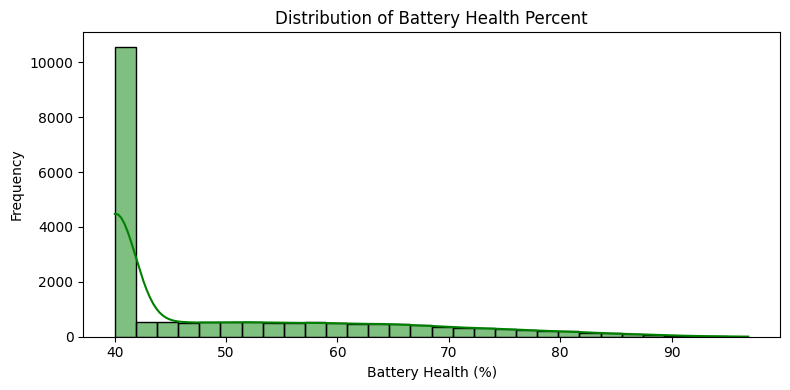

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(df['Battery_Health_Percent'], bins=30, kde=True, color='green')
plt.title('Distribution of Battery Health Percent')
plt.xlabel('Battery Health (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


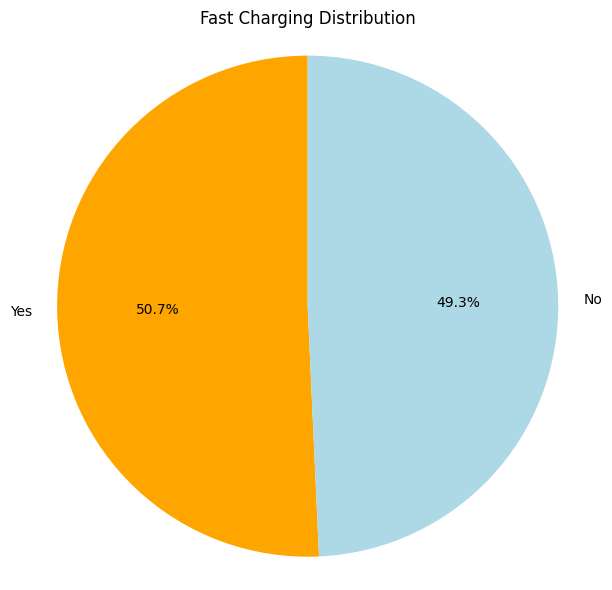

In [15]:
labels = df['Fast_Charging'].value_counts().index
sizes = df['Fast_Charging'].value_counts().values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'lightblue'])
plt.title('Fast Charging Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()


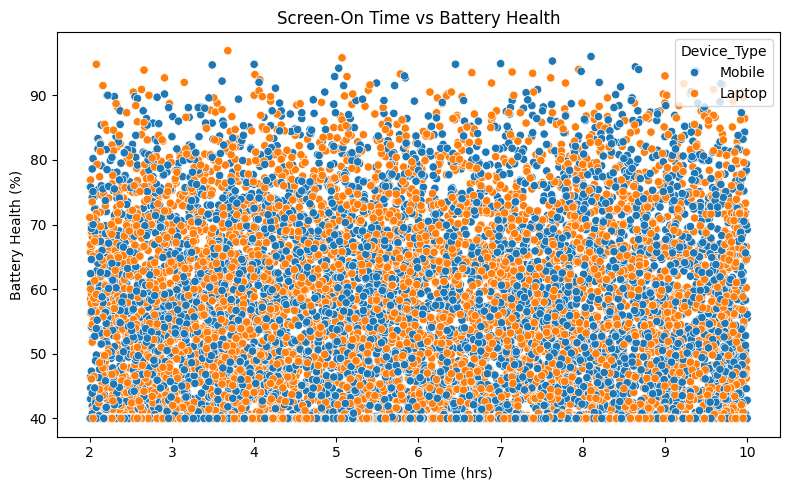

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Screen_On_Time_Hrs', y='Battery_Health_Percent', data=df, hue='Device_Type')
plt.title('Screen-On Time vs Battery Health')
plt.xlabel('Screen-On Time (hrs)')
plt.ylabel('Battery Health (%)')
plt.tight_layout()
plt.show()


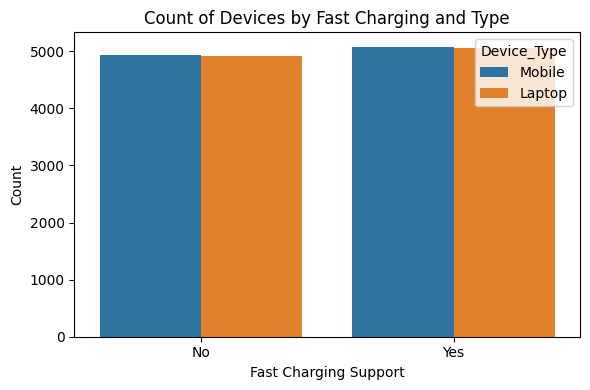

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Fast_Charging', hue='Device_Type', data=df)
plt.title('Count of Devices by Fast Charging and Type')
plt.xlabel('Fast Charging Support')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [18]:
# Encode categorical columns
label_encoders = {}

# Loop over only object (categorical) columns in the DataFrame
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [19]:
# Separate features and target
x = df.iloc[:,:-1]
y = df['Battery_Health_Percent']  # No encoding here — it's numeric for regression

In [20]:
x

,Device_Type,Battery_Capacity_mAh,Charge_Cycles,Avg_Temp_Celsius,Avg_Charge_Time_Hrs,Fast_Charging,Screen_On_Time_Hrs,Age_Months
0,1,4556,1256,45.1,1.25,0,3.11,21
1,0,6437,913,49.0,2.53,0,8.02,58
2,1,4396,597,48.9,2.31,0,3.24,59
3,1,3116,1110,40.5,2.38,0,6.13,26
4,1,4436,1057,43.2,3.40,1,7.82,16
...,...,...,...,...,...,...,...,...
19995,1,3163,100,26.7,3.39,0,4.06,7
19996,1,3961,198,47.1,3.88,0,8.49,35
19997,1,3726,1165,27.1,4.16,0,3.16,42
19998,0,5027,417,39.9,1.47,0,9.78,12


In [21]:
# Step 5: Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((16000, 8), (4000, 8))

In [ ]:
from sklearn.Linear_model import LinearRgression
model=LinearRegression()
model.fit(x_train,y_train)

In [22]:
# Step 6: Train Model (Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)          
model.fit(x_train, y_train)  

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
model.score(x_train,y_train)

0.9979968283235532

In [24]:
# Step 7: Evaluate Model
y_pred = model.predict(x_test)
print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 2.426085462250001
R2 Score: 0.9856148244905438


In [25]:
# Step 8: Save Model
joblib.dump(model, "battery_health_model.joblib")
print("\nRegression model saved as 'battery_health_model.joblib'")


Regression model saved as 'battery_health_model.joblib'


In [26]:
# Step 9: Load and Predict
loaded_model = joblib.load("battery_health_model.joblib")
sample_prediction = loaded_model.predict(x_test[:5])
print("\nSample Predictions:", sample_prediction)


Sample Predictions: [54.194 40.    40.    40.    86.375]
